# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = st.mode(study_mouse_df["Mouse ID"])[0]
mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = study_mouse_df.loc[study_mouse_df["Mouse ID"].isin(mouse_id),:]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_mouse_cleaned_df = study_mouse_df.loc[~study_mouse_df["Mouse ID"].isin(mouse_id),:]
study_mouse_cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_mouse_cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = study_mouse_cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = study_mouse_cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = study_mouse_cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_volume = study_mouse_cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_volume = study_mouse_cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
study_mouse_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                       "Median Tumor Volume": median_tumor_volume,
                                       "Tumor Volume Variance": variance_tumor_volume,
                                       "Tumor Volume Std. Dev.": std_tumor_volume,
                                       "Tumor Volume Std. Err.": sem_tumor_volume
                                      })
study_mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

study_mouse_cleaned_agg = study_mouse_cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['min', 'median', 'var', 'std', 'sem']})
study_mouse_cleaned_agg


Tumor Volume (mm3)                                          
                            min     median        var       std       sem
Drug Regimen                                                             
Capomulin             23.343598  41.557809  24.947764  4.994774  0.329346
Ceftamin              45.000000  51.776157  39.290177  6.268188  0.469821
Infubinol             36.321346  51.820584  43.128684  6.567243  0.492236
Ketapril              45.000000  53.698743  68.553577  8.279709  0.603860
Naftisol              45.000000  52.509285  66.173479  8.134708  0.596466
Placebo               45.000000  52.288934  61.168083  7.821003  0.581331
Propriva              45.000000  50.446266  43.852013  6.622085  0.544332
Ramicane              22.050126  40.673236  23.486704  4.846308  0.320955
Stelasyn              45.000000  52.431737  59.450562  7.710419  0.573111
Zoniferol             45.000000  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

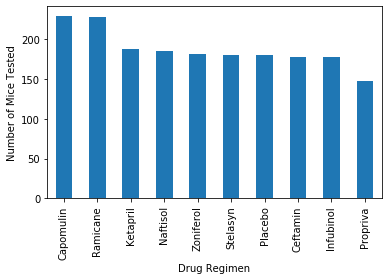

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
study_mouse_barchart_df = study_mouse_cleaned_df["Drug Regimen"].value_counts()
study_mouse_barchart_df.plot(kind="bar", figsize=(5.5, 4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

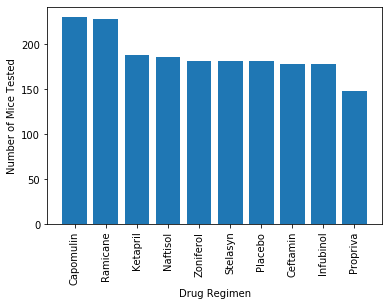

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.bar(study_mouse_barchart_df.index, study_mouse_barchart_df, align="center")
plt.show

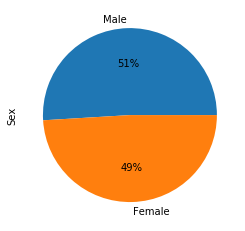

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_mouse_cleaned_mf_ratio = study_mouse_cleaned_df["Sex"].value_counts() 
study_mouse_cleaned_mf_ratio.plot(kind="pie", autopct="%1.0f%%")
plt.show()

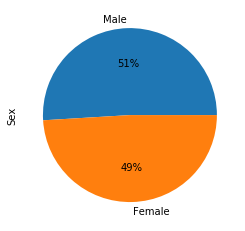

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = study_mouse_cleaned_mf_ratio.index
plt.pie(x=study_mouse_cleaned_mf_ratio, labels=labels, autopct="%1.0f%%")
plt.ylabel(study_mouse_cleaned_mf_ratio.name)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
study_mouse_max_tp_df = pd.DataFrame(study_mouse_cleaned_df.groupby("Mouse ID").max()["Timepoint"])
study_mouse_max_tp_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_mouse_merged_df = pd.merge(study_mouse_max_tp_df, study_mouse_cleaned_df, how="left", on=["Mouse ID", "Timepoint"])
study_mouse_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for treatment in treatment_list:
    drug_series = study_mouse_merged_df.loc[study_mouse_merged_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    quartiles = drug_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_volume = drug_series.loc[(drug_series < lower_bound) | (drug_series > upper_bound)]
    print(f"{treatment}'s potential outlines: {tumor_volume}")
    tumor_volume_data_list.append(drug_series)

Capomulin's potential outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlines: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)


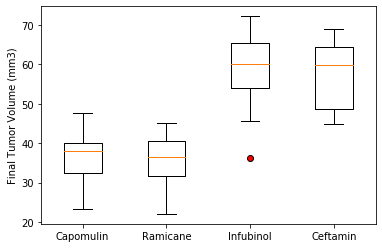

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
bp = ax1.boxplot(tumor_volume_data_list, labels=treatment_list)
plt.setp(bp['fliers'], color='red', marker='o', markerfacecolor='red')
plt.show()

## Line and Scatter Plots

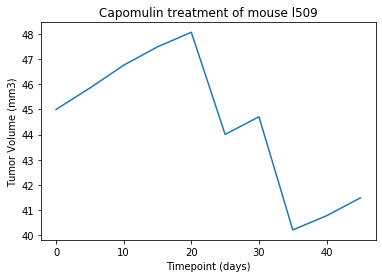

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mask_mouse_id = (study_mouse_cleaned_df["Mouse ID"] == "l509")
mask_drug_regimen = (study_mouse_cleaned_df["Drug Regimen"] == "Capomulin")
l509_capomulin_df = study_mouse_cleaned_df.loc[mask_mouse_id & mask_drug_regimen, ["Timepoint", "Tumor Volume (mm3)"]]
timepoint_series = l509_capomulin_df["Timepoint"]
tumer_series = l509_capomulin_df["Tumor Volume (mm3)"]
plt.plot(timepoint_series, tumer_series)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

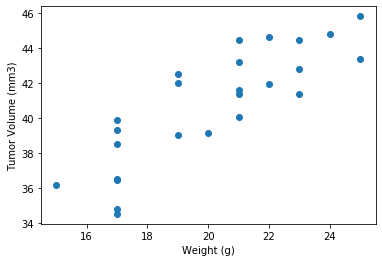

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = study_mouse_cleaned_df.loc[mask_drug_regimen, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_df = capomulin_df.groupby("Mouse ID").mean()
weight_series = capomulin_df["Weight (g)"]
tumor_series = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(weight_series, tumor_series)
plt.xlabel(weight_series.name)
plt.ylabel(tumor_series.name)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


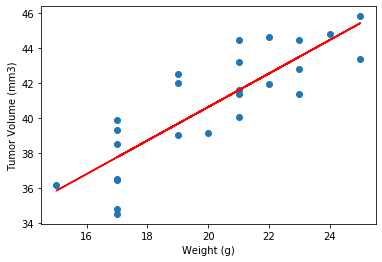

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weight_series,tumor_series)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(weight_series, tumor_series)
plt.xlabel(weight_series.name)
plt.ylabel(tumor_series.name)
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight_series, tumor_series)
pe_fit = pe_slope * weight_series + pe_int
plt.plot(weight_series,pe_fit,"-",color="r")
plt.show()